## Machine Learning: Regression (Module 2, week 3)
Keywords: Linear regression, polynomial regression, bias-variance tradeoff, overfitting.

In [162]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [193]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [194]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.pow(power)
    return poly_dataframe

In [195]:
def fit(features, target):
    regr = linear_model.LinearRegression()
    model = regr.fit(X=features.as_matrix(), y=target)
    intercept = model.intercept_
    coefficients = model.coef_
    print "Intercept: ", intercept
    print "Coefficients: ", coefficients
    return intercept, coefficients, model

In [196]:
def plot(features, output, model):
    plt.scatter(features['power_1'], output, color='blue', label='Output')
    plt.plot(features['power_1'], model.predict(features), 'r', label='Regression')
    plt.ylabel('Price')
    plt.xlabel('Sq.ft.')

In [204]:
def fit_plot(features, power, output):
    poly_data = polynomial_dataframe(features, power)
    intercept, coefficients, model = fit(poly_data, output)
    plot(poly_data, output, model)

In [197]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])

In [199]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


Intercept:  -43580.7430945
Coefficients:  [ 280.6235679]


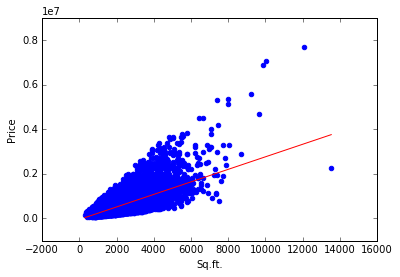

In [205]:
fit_plot(sales['sqft_living'], 1, sales['price'])

Intercept:  199222.279305
Coefficients:  [  6.79940947e+01   3.85812609e-02]


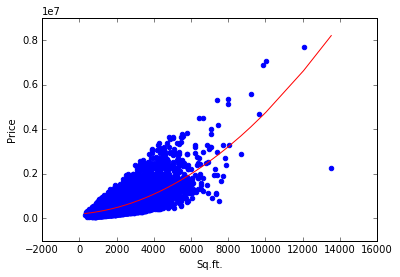

In [224]:
fit_plot(sales['sqft_living'], 2, sales['price'])

Intercept:  336819.748221
Coefficients:  [ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]


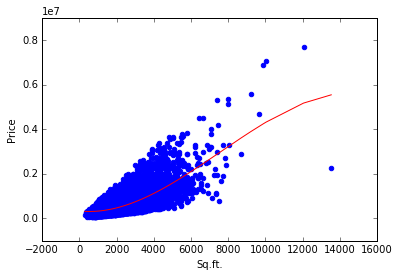

In [225]:
fit_plot(sales['sqft_living'], 3, sales['price'])

Intercept:  292893.004943
Coefficients:  [  7.87223777e-12   4.72647590e-09   4.06060003e-05  -1.10234944e-08
   1.19366591e-12  -4.40294935e-17]


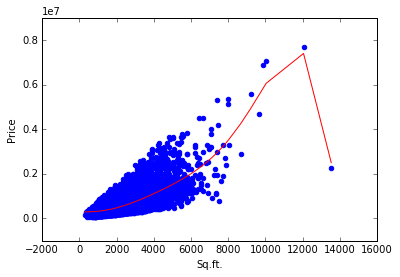

In [223]:
fit_plot(sales['sqft_living'], 6, sales['price'])

Intercept:  537116.329638
Coefficients:  [  4.56404164e-91   6.91713454e-51   2.57712972e-56   2.78197887e-88
   1.19863929e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


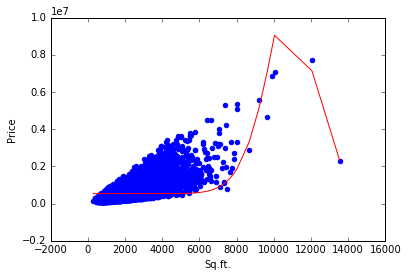

In [207]:
fit_plot(sales['sqft_living'], 15, sales['price'])

## 15th degree polynomial for 4 sets:

Intercept:  539058.818668
Coefficients:  [  3.05794168e-90  -1.69394946e-49   2.35916782e-55   1.21888065e-88
   3.23082736e-74   1.10358333e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]
Intercept:  506868.378501
Coefficients:  [  2.71335949e-77   7.33541093e-39  -1.85014904e-44   8.43131532e-50
  -2.08809743e-53   1.51934987e-58   3.64549616e-55   1.50416258e-51
   5.76015665e-48   1.95770497e-44   5.39396539e-41   9.40376360e-38
  -3.63529141e-41   4.65476524e-45  -1.97199308e-49]
Intercept:  530874.316653
Coefficients:  [  2.83751934e-88  -7.80224129e-49   2.90781153e-55  -7.96545956e-59
   1.57170169e-72   4.27894908e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]
Intercept:  494818.885502
Coefficients:  [  1.37116050e-76   2.79675964e-40  -4.25058440e-44   6.

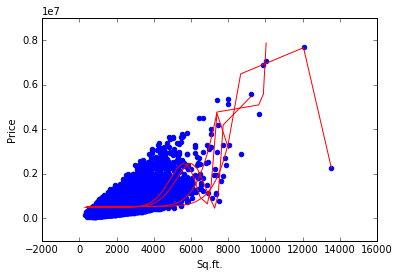

In [229]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

fit_plot(set_1['sqft_living'], 15, set_1['price'])
fit_plot(set_2['sqft_living'], 15, set_2['price'])
fit_plot(set_3['sqft_living'], 15, set_3['price'])
fit_plot(set_4['sqft_living'], 15, set_4['price'])

## Cross validation
Perform cross validation from 1 to 15 degrees (15 polynomial powers) and pick the model with the lowest validation RSS.

In [208]:
training_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
validation_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [231]:
MAX_DEGREE = 15
for degree in range(1, MAX_DEGREE+1):
    print "Degree: ", degree
    poly_data_train = polynomial_dataframe(training_data['sqft_living'], degree)
    intercept, coefficients, model = fit(poly_data_train, training_data['price'])
    poly_data_validation = polynomial_dataframe(validation_data['sqft_living'], degree)
    print "RSS: ", np.sum((validation_data['price'] - model.predict(poly_data_validation))**2)
    print "--------"

Degree:  1
Intercept:  -59493.3171652
Coefficients:  [ 288.59846375]
RSS:  6.290978863e+14
--------
Degree:  2
Intercept:  267506.280132
Coefficients:  [ 1.22673842  0.0522949 ]
RSS:  6.23955062707e+14
--------
Degree:  3
Intercept:  262170.64834
Coefficients:  [  7.50292074e+00   5.03063603e-02   1.67090667e-07]
RSS:  6.25820280252e+14
--------
Degree:  4
Intercept:  277368.461722
Coefficients:  [ -1.53852721e+01   6.08970906e-02  -1.61496571e-06   9.11725302e-11]
RSS:  6.29987341468e+14
--------
Degree:  5
Intercept:  266178.100527
Coefficients:  [  3.19604020e-05   5.44376194e-02  -6.35220172e-07   4.74146648e-11
  -2.00714209e-16]
RSS:  6.28240679314e+14
--------
Degree:  6
Intercept:  297506.756636
Coefficients:  [  8.50063329e-12   1.43264309e-08   3.79412711e-05  -9.89794250e-09
   1.06074707e-12  -3.90874342e-17]
RSS:  5.66268593826e+14
--------
Degree:  7
Intercept:  344491.52334
Coefficients:  [  8.80209599e-19   1.06735181e-12   8.65239821e-12   1.40282516e-08
  -4.30479933e

### Best power/degree = 6

In [239]:
degree = 6
poly_data_train = polynomial_dataframe(training_data['sqft_living'], degree)
intercept, coefficients, model = fit(poly_data_train, training_data['price'])
poly_data_test = polynomial_dataframe(test_data['sqft_living'], degree)
print "RSS: ", np.sum((test_data['price'] - model.predict(poly_data_test))**2)

Intercept:  297506.756636
Coefficients:  [  8.50063329e-12   1.43264309e-08   3.79412711e-05  -9.89794250e-09
   1.06074707e-12  -3.90874342e-17]
RSS:  1.35225114644e+14
